In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("data/cardio_train.csv", delimiter=";")

### Ajustando Outliers
 - height: 140 220
 - weight: 40 200
 - ap_hi: 240 100
 - ap_lo: 140 60
 - age_years: 39 64

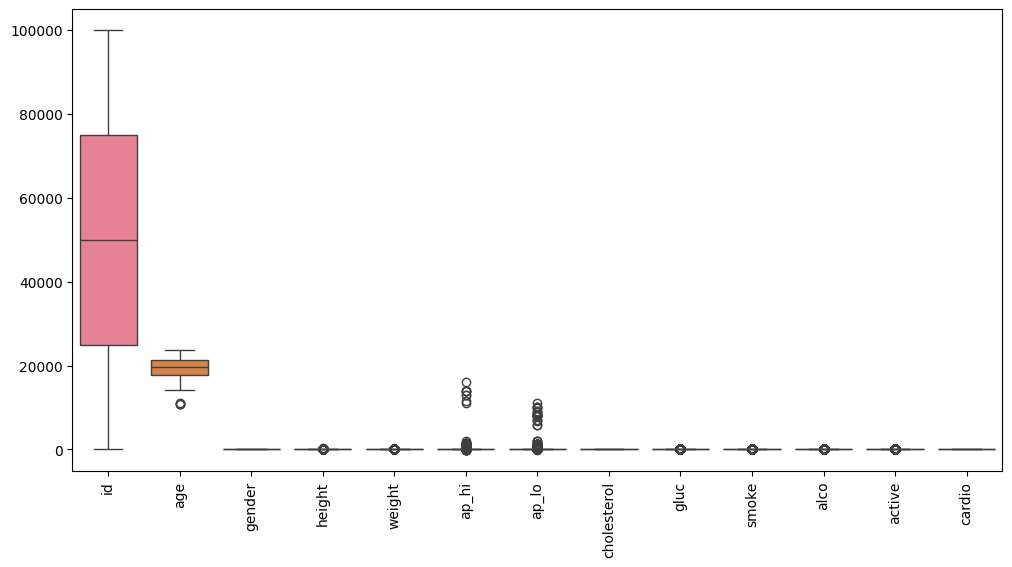

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotaciona os nomes das colunas
plt.show()

In [14]:
# Converter a Idade de Dias para Anos
df["age_years"] = (df["age"] // 365).astype(int)  # Divide por 365 e mantém apenas o inteiro

# Exibir as 5 primeiras linhas para verificar
print(df[["age", "age_years"]].head())

     age  age_years
0  18393         50
1  20228         55
2  18857         51
3  17623         48
4  17474         47


In [15]:
# Aplicar os filtros
df_filtrado = df[
    (df['height'].between(140, 220)) & 
    (df['weight'].between(40, 200)) & 
    (df['ap_hi'].between(100, 240)) & 
    (df['ap_lo'].between(60, 140)) & 
    (df['age_years'].between(39, 64))
]

In [16]:
print(df_filtrado.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years  
0     0       1       0         50  
1     0       1       1         55  
2     0       0       1         51  
3     0       1       1         48  
4     0       0       0         47  


In [17]:
print(df_filtrado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67348 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           67348 non-null  int64  
 1   age          67348 non-null  int64  
 2   gender       67348 non-null  int64  
 3   height       67348 non-null  int64  
 4   weight       67348 non-null  float64
 5   ap_hi        67348 non-null  int64  
 6   ap_lo        67348 non-null  int64  
 7   cholesterol  67348 non-null  int64  
 8   gluc         67348 non-null  int64  
 9   smoke        67348 non-null  int64  
 10  alco         67348 non-null  int64  
 11  active       67348 non-null  int64  
 12  cardio       67348 non-null  int64  
 13  age_years    67348 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.7 MB
None


### Modificando os valores das colunas Colesterol e Glicose

In [19]:
print(df_filtrado['gluc'].unique())
print(df_filtrado['cholesterol'].unique())

[1 2 3]
[1 3 2]


In [21]:
# Cria a cópia de df_filtrado e chama de staging_data

staging_data = df_filtrado.copy()

In [22]:
staging_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [23]:
# Substituir os valores das colunas categóricas
staging_data['gluc'] = staging_data['gluc'].map({1: 'normal', 2: 'acima_do_normal', 3: 'muito_alto'})
staging_data['cholesterol'] = staging_data['cholesterol'].map({1: 'normal', 2: 'acima_do_normal', 3: 'muito_alto'})
staging_data['gender'] = staging_data['gender'].map({1: 'feminino', 2: 'masculino'})

In [24]:
staging_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,masculino,168,62.0,110,80,normal,normal,0,0,1,0,50
1,1,20228,feminino,156,85.0,140,90,muito_alto,normal,0,0,1,1,55
2,2,18857,feminino,165,64.0,130,70,muito_alto,normal,0,0,0,1,51
3,3,17623,masculino,169,82.0,150,100,normal,normal,0,0,1,1,48
4,4,17474,feminino,156,56.0,100,60,normal,normal,0,0,0,0,47


In [25]:
print(staging_data.info())  # Informações sobre colunas, tipos de dados e valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 67348 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           67348 non-null  int64  
 1   age          67348 non-null  int64  
 2   gender       67348 non-null  object 
 3   height       67348 non-null  int64  
 4   weight       67348 non-null  float64
 5   ap_hi        67348 non-null  int64  
 6   ap_lo        67348 non-null  int64  
 7   cholesterol  67348 non-null  object 
 8   gluc         67348 non-null  object 
 9   smoke        67348 non-null  int64  
 10  alco         67348 non-null  int64  
 11  active       67348 non-null  int64  
 12  cardio       67348 non-null  int64  
 13  age_years    67348 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 7.7+ MB
None


#### Nova Matriz de Correlação
 - Somente variáveis numéricas
 - Remover também id e age

             height    weight     ap_hi     ap_lo     smoke      alco  \
height     1.000000  0.305897 -0.000198  0.018301  0.196047  0.098518   
weight     0.305897  1.000000  0.257775  0.241036  0.067235  0.066884   
ap_hi     -0.000198  0.257775  1.000000  0.719271  0.027471  0.035119   
ap_lo      0.018301  0.241036  0.719271  1.000000  0.024869  0.036784   
smoke      0.196047  0.067235  0.027471  0.024869  1.000000  0.341187   
alco       0.098518  0.066884  0.035119  0.036784  0.341187  1.000000   
active    -0.009820 -0.016982 -0.002283 -0.001278  0.024656  0.023998   
cardio    -0.019455  0.173636  0.424214  0.335546 -0.016679 -0.008873   
age_years -0.093728  0.049466  0.198647  0.144438 -0.050032 -0.029896   

             active    cardio  age_years  
height    -0.009820 -0.019455  -0.093728  
weight    -0.016982  0.173636   0.049466  
ap_hi     -0.002283  0.424214   0.198647  
ap_lo     -0.001278  0.335546   0.144438  
smoke      0.024656 -0.016679  -0.050032  
alco       

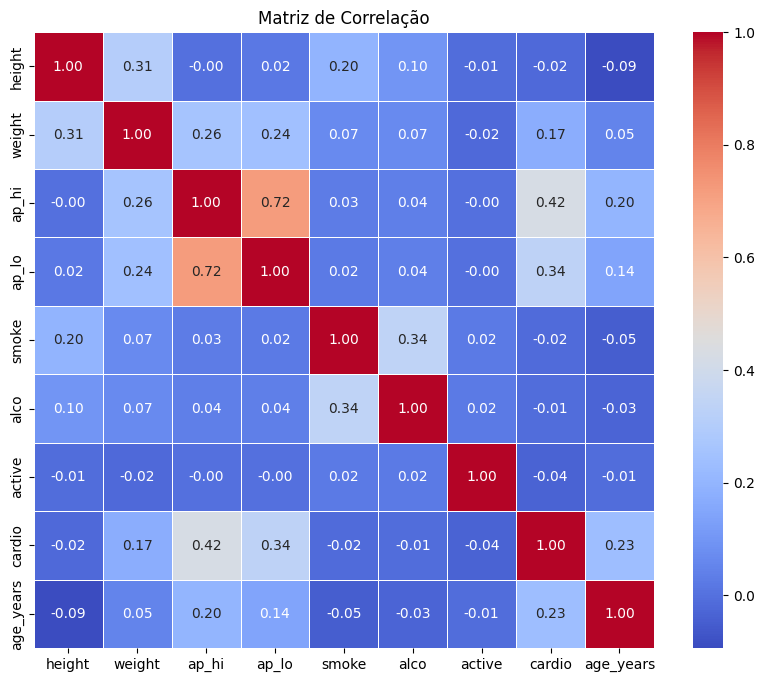

In [30]:
# Correlação entre variáveis

# Selecionar apenas as colunas numéricas, excluindo 'id' e 'age'
staging_data_numeric = staging_data.select_dtypes(include=['number']).drop(columns=['id', 'age'])

# Calcular a matriz de correlação
correlation_matrix = staging_data_numeric.corr()

# Exibir a matriz de correlação no console
print(correlation_matrix)

# Criar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

#### Salvar o dataset tratado

In [32]:
# Salvar o DataFrame em um arquivo CSV dentro do diretório 'data'
staging_data.to_csv("data/staging_data.csv", index=False)